<a href="https://colab.research.google.com/github/MauroTalamantes/AnalisisImagenEurosat/blob/main/AnalisisEurosat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.8 MB/s eta 0:00:00


In [ ]:
# Importar y verificar la versión "datasets"
import datasets
print(datasets.__version__) # Mostrar la versión instalada

3.4.0


In [ ]:
from datasets import load_dataset
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
EuroSAT_RGB = load_dataset("blanchon/EuroSAT_RGB")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.38k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/34.8M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16200 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5400 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5400 [00:00<?, ? examples/s]

In [ ]:
print(EuroSAT_RGB)

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'filename'],
        num_rows: 16200
    })
    test: Dataset({
        features: ['image', 'label', 'filename'],
        num_rows: 5400
    })
    validation: Dataset({
        features: ['image', 'label', 'filename'],
        num_rows: 5400
    })
})


In [ ]:
# Seleccionar una imagen del dataset
img_data = EuroSAT_RGB['train'][25]['image']

In [ ]:
# Convertir a numpy array
img_np = np.array(img_data)

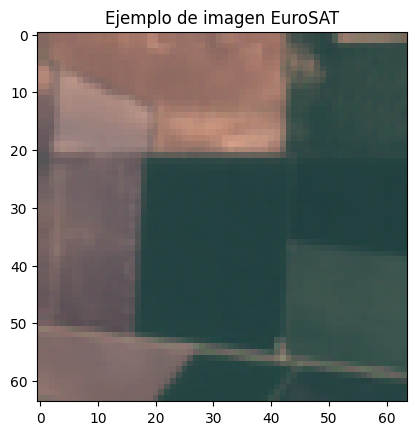

In [ ]:
plt.imshow(img_np)
plt.title("Ejemplo de imagen EuroSAT")
plt.show()

In [ ]:
img_np.shape

(64, 64, 3)

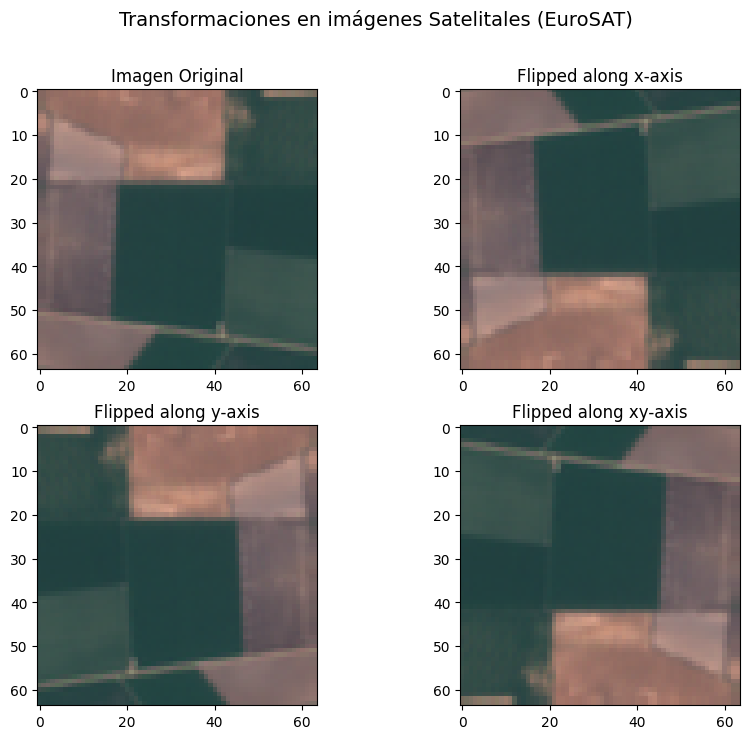

In [ ]:
# Aplicar transformaciones
img_flipX = cv2.flip(img_np, 0)
img_flipY = cv2.flip(img_np, 1)
img_flipXY = cv2.flip(img_np, -1)

# Imágenes: original y transformada
plt.figure(figsize = (10, 8))
plt.suptitle("Transformaciones en imágenes Satelitales (EuroSAT)", fontsize = 14)

plt.subplot(2,2,1)
plt.imshow(img_np)
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(img_flipX)
plt.title("Flipped along x-axis")

plt.subplot(2,2,3)
plt.imshow(img_flipY)
plt.title("Flipped along y-axis")

plt.subplot(2,2,4)
plt.imshow(img_flipXY)
plt.title("Flipped along xy-axis")
plt.show()

In [ ]:
img_data = EuroSAT_RGB['train'][15000]['image'] # Seleccionar la imagen "255" de la bd
img_np = np.array(img_data) # Convertir la imagen en un array NumPy para su debido procesamiento

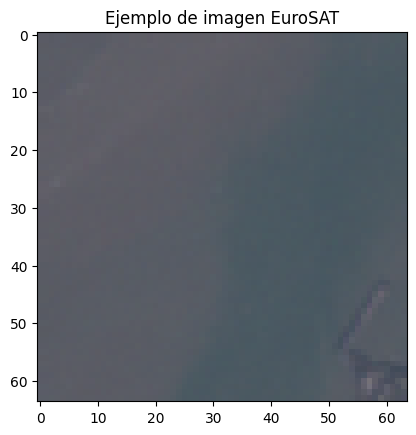

In [ ]:
plt.imshow(img_np)
plt.title("Ejemplo de imagen EuroSAT")
plt.show()

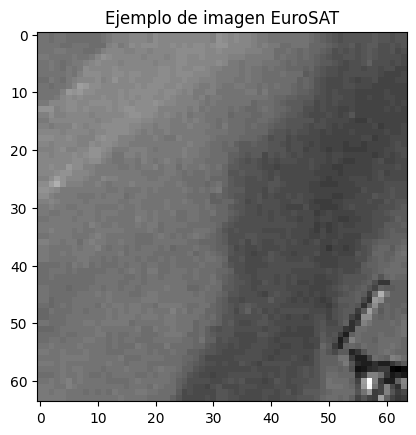

In [ ]:
# Convertir la imagen a escala de grises
gray_img = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap = 'gray')
plt.title("Ejemplo de imagen EuroSAT")
plt.show()

In [ ]:
# Calcula el histograma de la imagen en escala de grises
hist_gray = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

# Calcula los histogramas para los canales de color (RGB)
hist_r = cv2.calcHist([img_np], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img_np], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([img_np], [2], None, [256], [0, 256])

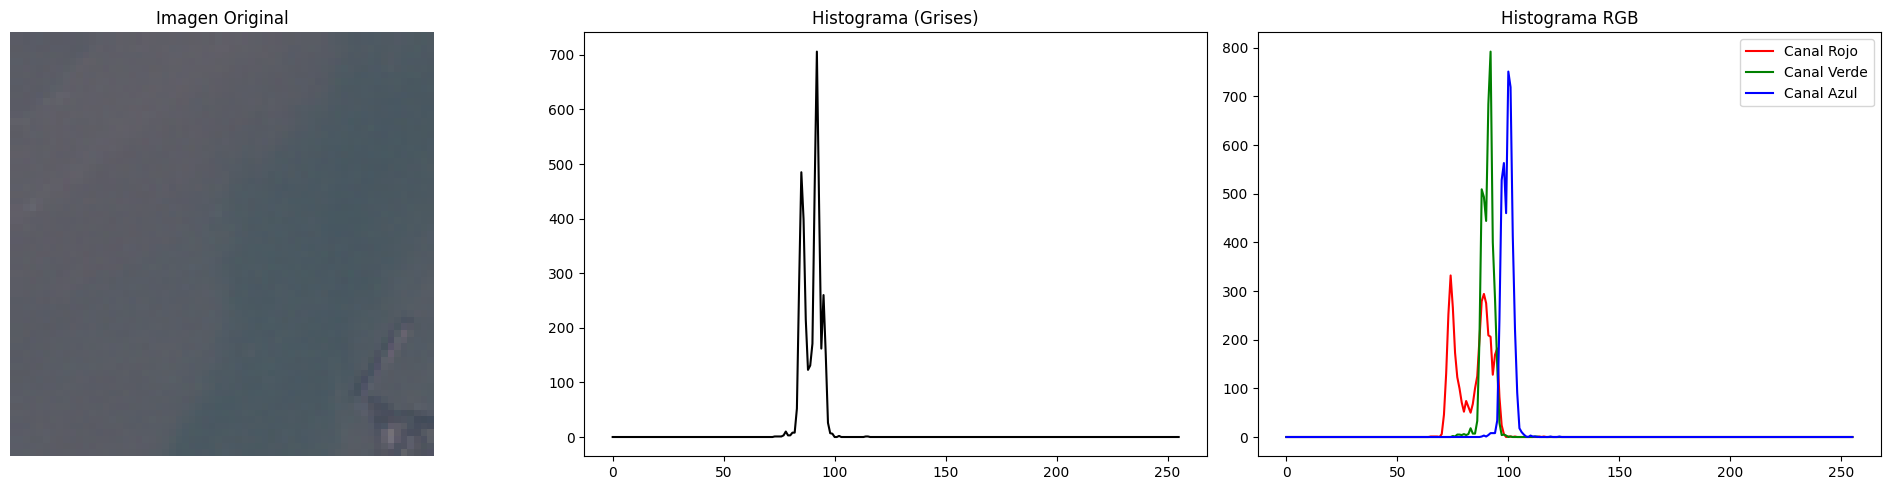

In [ ]:
# Visualización de los histogramas

fig, axes = plt.subplots(1, 3, figsize = (20, 5))
axes[0].imshow(img_np)
axes[0].set_title("Imagen Original")
axes[0].axis('off')

axes[1].plot(hist_gray, color = 'black')
axes[1].set_title("Histograma (Grises)")

axes[2].plot(hist_r, color = 'red', label = 'Canal Rojo')
axes[2].plot(hist_g, color = 'green', label = 'Canal Verde')
axes[2].plot(hist_b, color = 'blue', label = 'Canal Azul')
axes[2].legend()
axes[2].set_title("Histograma RGB")

plt.tight_layout()
plt.show()